In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A1/df_synA_test_hard_shuffled_sample.csv")

In [3]:
df_0 = pd.read_csv("C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A1/df_synA_train_shuffled.csv")

In [19]:
df = df.sample(frac = 1)

In [4]:
X_clean = df_0.drop(columns=['era', 'target_10_val','target_5_val', 'data_type' ])
Y_clean = df_0['target_10_val']
Y_clean_list = list(Y_clean.unique())
Y_clean_new = np.zeros(len(Y_clean))
Y_clean_Y_clean_new_dict = {}
count = 0
for i in range(len(Y_clean)):
    if(Y_clean[i] not in Y_clean_Y_clean_new_dict):
        Y_clean_Y_clean_new_dict[Y_clean[i]] = count
        Y_clean_new[i] = Y_clean_Y_clean_new_dict[Y_clean[i]]
        count+=1
    else:
        Y_clean_new[i] = Y_clean_Y_clean_new_dict[Y_clean[i]]

In [5]:
X = df.drop(columns=['era', 'target_10_val','target_5_val','data_type' ])
Y = df['target_10_val']
Y_list = list(Y.unique())
Y_new = np.zeros(len(Y))
Y_Y_new_dict = {}
count = 0
for i in range(len(Y)):
    if(Y[i] not in Y_Y_new_dict):
        Y_Y_new_dict[Y[i]] = count
        Y_new[i] = Y_Y_new_dict[Y[i]]
        count+=1
    else:
        Y_new[i] = Y_Y_new_dict[Y[i]]

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the dimensions of input and output
input_dim = 26  # Dimension of input vector
output_dim = 5  # Number of output classes

# Encoder
input_vector = Input(shape=(input_dim,))
encoded = Dense(256, activation='relu')(input_vector)  # Encoding layer with 16 neurons
encoded = Dense(64, activation='relu')(encoded)       # Encoding layer with 8 neurons
encoded = Dense(5, activation='relu')(encoded)       # Encoding layer with 4 neurons

# Decoder
decoded = Dense(64, activation='relu')(encoded)       # Decoding layer with 8 neurons
decoded = Dense(256, activation='relu')(decoded)      # Decoding layer with 16 neurons
decoded = Dense(input_dim, activation='relu')(decoded)  # Decoding layer with original dimension

# Define the autoencoder model
autoencoder = Model(input_vector, decoded)

# Define the encoder model
encoder = Model(input_vector, encoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mse')

# Print the summary of the autoencoder model
autoencoder.summary()

# Now you can use the encoder model to obtain encodings of all data points



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26)]              0         
                                                                 
 dense (Dense)               (None, 256)               6912      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 26)                6682  

In [43]:
df.head(5)

,Open_n_val,High_n_val,Low_n_val,Close_n_val,Volume_n_val,SMA_10_val,SMA_20_val,CMO_14_val,High_n-Low_n_val,Open_n-Close_n_val,...,SMA_20-SMA_10_changelen_val,Close_n_slope_3_changelen_val,Close_n_slope_5_changelen_val,Close_n_slope_10_changelen_val,row_num,day,era,target_10_val,target_5_val,data_type
1629,0.5,0.5,0.50,0.50,0.0,0.50,0.75,0.25,0.25,0.75,...,1.0,0.50,0.50,0.25,77,549,17,1.00,1.00,validation
53060,1.0,0.5,0.75,0.75,0.0,0.75,0.50,0.75,0.25,0.75,...,0.0,0.50,0.50,0.50,84,446,16,0.75,0.25,validation
148708,1.0,1.0,1.00,1.00,0.0,0.25,0.00,1.00,0.75,0.25,...,0.0,0.50,0.50,0.50,79,494,15,0.75,0.25,validation
31459,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.25,0.00,...,0.5,0.25,0.25,0.50,106,380,7,0.25,0.00,validation
176220,0.0,0.0,0.00,0.00,0.0,0.75,1.00,0.25,0.00,1.00,...,1.0,0.50,0.00,0.00,133,414,15,0.00,0.00,validation


In [44]:
df_ = df.drop(columns=['data_type'])

In [7]:

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, Y_clean_new, test_size=0.6, random_state=42)
X_train, X_test_dn, y_train, y_test_dn = train_test_split(X, Y_new, test_size=0.6, random_state=42)

In [8]:
X_train = X_train.astype('float32')
X_train_clean = X_train_clean.astype('float32')
X_test_dn = X_test_dn.astype('float32')
X_test_clean = X_test_clean.astype('float32')


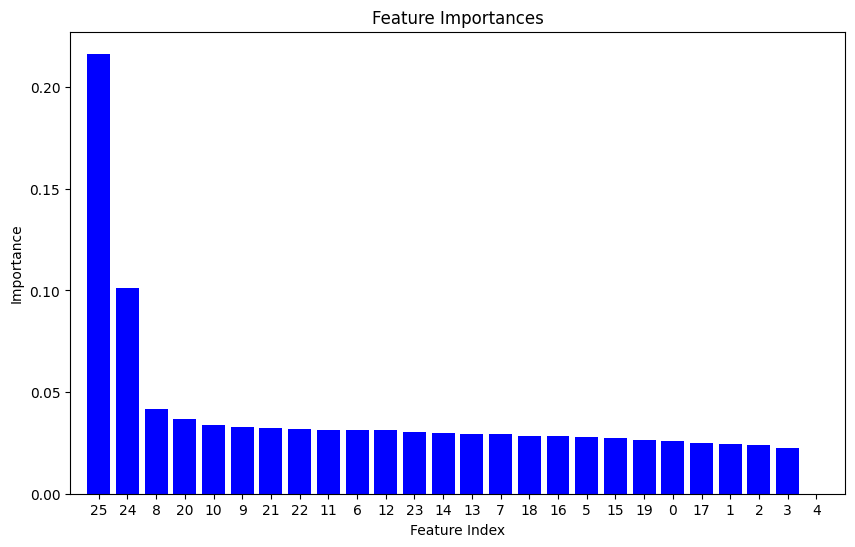

In [81]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on your data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [97]:
indices[:5]

array([25, 24,  8, 20, 10], dtype=int64)

In [98]:

X_filtered = X.drop(df.columns[indices[-21:]], axis=1)

In [99]:
len(list(X_filtered))

5

In [15]:
len(X_train),len( X_train_clean),len(X_test_dn),len(X_test_clean)

(99840, 124800, 149760, 187200)

In [16]:
autoencoder.fit(X_train, X_train_clean[:99840], epochs=100, batch_size=128,validation_data=(X_test_dn, X_test_clean[:149760]))

Epoch 1/100
780/780 [==============================] - 6s 7ms/step - loss: 194.0681 - val_loss: 189.9166
Epoch 2/100
780/780 [==============================] - 5s 6ms/step - loss: 185.4269 - val_loss: 184.1690
Epoch 3/100
780/780 [==============================] - 5s 6ms/step - loss: 176.3280 - val_loss: 170.2428
Epoch 4/100
780/780 [==============================] - 5s 7ms/step - loss: 168.2385 - val_loss: 183.8716
Epoch 5/100
780/780 [==============================] - 5s 7ms/step - loss: 160.7639 - val_loss: 152.3736
Epoch 6/100
780/780 [==============================] - 5s 7ms/step - loss: 154.3518 - val_loss: 147.5452
Epoch 7/100
780/780 [==============================] - 5s 7ms/step - loss: 148.6755 - val_loss: 139.8854
Epoch 8/100
780/780 [==============================] - 5s 7ms/step - loss: 142.5918 - val_loss: 136.5620
Epoch 9/100
780/780 [==============================] - 5s 7ms/step - loss: 139.0198 - val_loss: 134.6144
Epoch 10/100
780/780 [==============================] -

In [62]:
output_test = autoencoder.predict(X_test_dn)
output_train = autoencoder.predict(X_train)

3120/3120 [==============================] - 4s 1ms/step


In [17]:
output = autoencoder.predict(X)

7800/7800 [==============================] - 12s 2ms/step


In [65]:
d={}
for i in Y_new:
    d[i]=0
print(d)

{0.0: 0, 1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0}


In [ ]:
import joblib
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout
from keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
# Generating synthetic sinusoidal dataset with noise
# np.random.seed(0)
# X = np.linspace(0, 1, 1000)
# y = np.sin(2 * np.pi * X) + np.random.normal(0, 0.1, X.shape[0])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Splitting dataset into train and test sets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel

# Step 1: Data Preprocessing
# Assuming X contains features and y contains labels
# Perform data preprocessing to reduce noise
# For example, use robust scaling to handle outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Feature Engineering
# Select the most relevant features that are less affected by noise
# Use SelectFromModel with RandomForestClassifier for feature selection
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf_classifier, threshold='median')
X_selected = selector.fit_transform(X_scaled, Y_new)

# Step 3: Train-Test Split



# Define the MLP model
def adap(epoch):
    return 0.0001*epoch

my_sched = LearningRateScheduler(adap)


In [115]:
len(X_scaled)

249600

In [116]:
from sklearn.metrics.pairwise import cosine_similarity as cos


arr = cos(X_scaled[:20000], X_scaled[:20000])

In [119]:
from sklearn.preprocessing import normalize

arr_norm = normalize(arr, norm="l2")
means=[]
for i in arr_norm:
    x = np.mean(i)
    means.append(x)

In [120]:
means

[0.002655540906971975,
 0.001304340035065715,
 0.0019325911746702136,
 0.0016369000928562044,
 0.0010023557361442592,
 0.001732928045578689,
 0.0005188753674415234,
 0.002062246062908745,
 0.0023309849471829947,
 0.0012355054179489012,
 -0.0015274413802977996,
 -0.00038574306102361273,
 0.0021018970543007333,
 -0.0015461885109281487,
 0.0014763593217752946,
 0.0022161009393182026,
 0.0008765699907644789,
 0.001363575087631704,
 0.0013584171074638,
 -0.0008381143740390497,
 0.0024151936032440814,
 0.002201163714438763,
 0.001343204992292787,
 0.0025442593955800016,
 0.00276490383290671,
 -0.0015354370743453653,
 -0.0014232584486361872,
 0.0015697245296543867,
 0.002286517642197622,
 0.0020706465642844813,
 -0.0005543596411729846,
 -0.0011974180583089484,
 0.002398265628420064,
 0.00194734408196536,
 0.0028111411953969066,
 0.0034840582012773103,
 0.002112887836442892,
 0.0025059013534903594,
 0.002095432500798798,
 0.0018271345757475575,
 0.0019051701550483252,
 0.00263715805452732,
 0.

In [121]:
from collections import Counter

new_labels=[]
for i in range(0,20000):
    lab = []
    for j in range(0,20000):
        # print(i,j)
        if arr[i][j] > means[i]:
            lab.append(Y[j])
    count = Counter(lab)
    most_common_element = max(count, key=count.get)    
    new_labels.append(most_common_element)

In [ ]:
new_labels

In [18]:
X_train, X_test, y_train, y_test = train_test_split(output, Y_new, test_size=0.2, random_state=42)

In [21]:
model = Sequential([
    Dense(512, input_shape=(26,), activation='relu'),
    Dense(256, activation='relu'),
    # # Dropout(0.2),
    # Dense(128, activation='relu'),
    # # Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Output layer with softmax activation for multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=100, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

joblib.dump(model, "C:/Users/Aaditya Gupta/OneDrive/Desktop/AML_A1/model_0.joblib")

Epoch 1/500
1798/1798 [==============================] - 10s 5ms/step - loss: 1.6437 - accuracy: 0.2480 - val_loss: 1.7003 - val_accuracy: 0.2440
Epoch 2/500
1798/1798 [==============================] - 9s 5ms/step - loss: 1.4571 - accuracy: 0.2496 - val_loss: 1.4346 - val_accuracy: 0.2440
Epoch 3/500
1798/1798 [==============================] - 8s 5ms/step - loss: 1.4382 - accuracy: 0.2509 - val_loss: 1.4332 - val_accuracy: 0.2618
Epoch 4/500
1798/1798 [==============================] - 9s 5ms/step - loss: 1.4358 - accuracy: 0.2508 - val_loss: 1.4316 - val_accuracy: 0.2618
Epoch 5/500
1798/1798 [==============================] - 9s 5ms/step - loss: 1.4351 - accuracy: 0.2533 - val_loss: 1.4322 - val_accuracy: 0.2618
Epoch 6/500
1798/1798 [==============================] - 9s 5ms/step - loss: 1.4354 - accuracy: 0.2530 - val_loss: 1.4321 - val_accuracy: 0.2618
Epoch 7/500
1798/1798 [==============================] - 9s 5ms/step - loss: 1.4347 - accuracy: 0.2544 - val_loss: 1.4321 - val_a

: 